## Clasification of phishng and benign URLs
* Loading dataset from CSV file
* Data exploration with 2D and 3D plots
* Classification with KNN
* Classifier evaluation

In [ ]:
# Load CSV
import pandas as pd
import numpy as np


filename_train = 'train.csv'
filename_test = 'test.csv'

# Loading with Pandas
data_train = pd.read_csv(filename_train)
data_test = pd.read_csv(filename_test)

TRAIN_COUNT = len(data_train.index)
TEST_COUNT = len(data_test.index)
print("Train records:", TRAIN_COUNT, "Test records:", TEST_COUNT)

data = pd.concat([data_train, data_test], ignore_index=True)

print(data.shape)
#data
#data.dtypes

# Transforming 'object' data to 'categorical' to get numerical (ordinal numbers) representation
data['Registrar'] = data['Registrar'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Protocol'] = data['Protocol'].astype('category')
data['Class'] = data['Class'].astype('category')

data['Registrar_code'] = data['Registrar'].cat.codes
data['Country_code'] = data['Country'].cat.codes
data['Protocol_code'] = data['Protocol'].cat.codes
data['Class_code'] = data['Class'].cat.codes

#pd.options.display.max_rows=1000
data

Train records: 192 Test records: 10
(202, 5)


,Registrar,Lifetime,Country,Protocol,Class,Registrar_code,Country_code,Protocol_code,Class_code
0,godaddy,1,US,http,phishing,84,28,0,1
1,"REGISTER.COM, INC.",9,US,http,phishing,59,28,0,1
2,godaddy,2,NaN,http,phishing,84,-1,0,1
3,"PSI-USA, INC. DBA DOMAIN ROBOT",3,Ireland,http,phishing,55,12,0,1
4,PDR LTD. D/B/A PUBLICDOMAINREGISTRY.COM,5,India,http,phishing,54,11,0,1
...,...,...,...,...,...,...,...,...,...
197,"Vitalwerks Internet Solutions, LLC DBA No-IP (...",14,Canada,https,benign,70,5,1,0
198,Onlinenic Inc,5,US,https,benign,53,28,1,0
199,"TUCOWS, INC.",7,US,https,benign,68,28,1,0
200,"NETWORK SOLUTIONS, LLC",6,US,https,benign,48,28,1,0


### Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

#  Create feature matrix
X_raw = data[['Registrar_code', 'Lifetime', 'Country_code', 'Protocol_code']].values
X = min_max_scaler.fit_transform(X_raw)
#Target Variable
y = data['Class_code'].values

feature_names = data[['Registrar_code', 'Lifetime', 'Country_code', 'Protocol_code']].columns.values
#print(feature_names)
target_names = data['Class'].cat.categories
country_names = data['Country'].cat.categories
registrar_names = data['Registrar'].cat.categories
protocol_names = data['Protocol'].cat.categories
#print(target_names, country_names, registrar_names)


### Data exploration with 2D and 3D plots

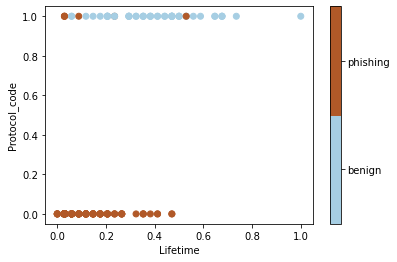

In [ ]:
import matplotlib.pyplot as plt

x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])
plt.scatter(X[:, x_index], X[:, y_index], c=y, cmap=plt.cm.get_cmap('Paired', 2))
plt.colorbar(ticks=[0, 1], format=formatter)
plt.clim(-0.5, 1.5)
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index]);
plt.show()

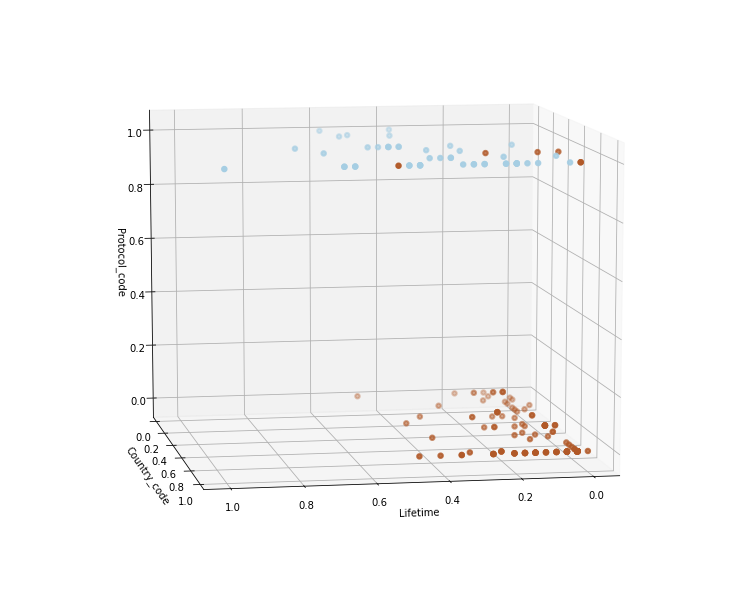

In [ ]:
 from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=80)
ax.scatter(X[:, 1], X[:, 2], X[:, 3], lw=2, c=y, cmap='Paired')
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[2]);
ax.set_zlabel(feature_names[3]);
plt.show()

In [ ]:
from sklearn import neighbors

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model using the training dataset
X_train = X[:TRAIN_COUNT]
y_train = y[:TRAIN_COUNT]
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# predict class of URLs for the test dataset
X_test = X[TRAIN_COUNT:]
y_test = y[TRAIN_COUNT:]
y_pred = knn.predict(X_test)
print("Actual   :", y_test)
print("Predicted:", y_pred)

Actual   : [1 1 1 1 1 0 0 0 0 0]
Predicted: [1 1 1 1 0 0 0 0 0 0]


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print (scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[1.   1.   0.95 1.   1.   0.95 1.   1.   0.95 0.95]
Accuracy: 0.980 (0.024)


### Classifier evaluation

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range (0, len(y_test)):
    #print(i, ":", y[i])
    if (y_test[i] == 1): # Positive
        if (y_test[i] == y_pred[i]):
            TP+=1
        else:
            FN+=1
            print (">>False Negative:\n", data_test.iloc[i])
    else:
        if (y_test[i] == y_pred[i]):
            TN+=1
        else:
            FP+=1
            print (">>False Positive:\n", data_test.iloc[i])


print(">>Results:\nTP =", TP, "TN =", TN, "FP =", FP, "FN =", FN)

TPR = TP / (TP+FN)
TNR = TN / (TN+FP)
FPR = FP / (FP+TN)
FNR = FN / (TP+FN)
PPV = (TP+TN) / (TP+TN+FP+FN)
NPV = TN / (TN+FN)
Fmeasure = 2*PPV*TPR / (PPV + TPR)

print("TPR =", TPR, "TNR =", TNR, "FPR =", FPR, "FNR =", FNR, "PPV =", PPV, "NPV =", NPV, "F-measure =", Fmeasure)

>>False Negative:
 Registrar    allegro.pl
Lifetime             18
Country              US
Protocol          https
Class          phishing
Name: 4, dtype: object
>>Results:
TP = 4 TN = 5 FP = 0 FN = 1
TPR = 0.8 TNR = 1.0 FPR = 0.0 FNR = 0.2 PPV = 0.9 NPV = 0.8333333333333334 F-measure = 0.8470588235294118
